In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import keras
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from skimage import color
from skimage import io
from skimage.transform import resize
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import random 
import matplotlib.pyplot as plt

In [3]:
(train_X, train_y), _ = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_X = train_X.reshape(60000, 28, 28, 1)
epochs = 12

In [5]:
#Dataset collection
from scipy.sparse import dok
random.seed(a = 1)
X = np.empty((0, 28, 28, 1), dtype = 'float32')
y = np.empty((0,), dtype = 'float32')
i = 0
#Pull a 'random' subset of 1's
while X.shape[0] < 25:
  i = random.randint(0, 60000)
  if train_y[i] == 1:
    X = np.append(X, train_X[i].reshape(1, 28, 28, 1), axis = 0)
    y = np.append(y, 0)

#Pull a 'random' subset of 5's
while X.shape[0] < 50:
  i = random.randint(0, 60000)
  if train_y[i] == 5:
    X = np.append(X, train_X[i].reshape(1, 28, 28, 1), axis = 0)
    y = np.append(y, 1)

#Change the pixel values to go from 0 to 1 instead of 0 to 255
X = X.astype('float32')
X = X / 255

#Since these are already randomly selected, the first 5 examples will be the test set
X_train = np.empty((0, 28, 28, 1), dtype = 'float32')
y_train = np.empty((0,), dtype = 'float32')
X_test = np.empty((0, 28, 28, 1), dtype = 'float32')
y_test = np.empty((0,), dtype = 'float32')

for i in range(0, 5):
  X_test = np.append(X_test, X[i].reshape(1, 28, 28, 1), axis = 0)
  y_test = np.append(y_test, 0)
for i in range(5, 25):
  X_train = np.append(X_train, X[i].reshape(1, 28, 28, 1), axis = 0)
  y_train = np.append(y_train, 0)
for i in range(25, 30):
  X_test = np.append(X_test, X[i].reshape(1, 28, 28, 1), axis = 0)
  y_test = np.append(y_test, 1)
for i in range(30, 50):
  X_train = np.append(X_train, X[i].reshape(1, 28, 28, 1), axis = 0)
  y_train = np.append(y_train, 1)

#One-hot encode 1 and 5
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [6]:
#Model Definition
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [7]:
#Model Fitting
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=1, epochs=epochs, verbose=1)

Epoch 1/12
40/40 [==============================] - 1s 11ms/step - loss: 0.3150 - accuracy: 0.8750
Epoch 2/12
40/40 [==============================] - 0s 11ms/step - loss: 0.0539 - accuracy: 0.9750
Epoch 3/12
40/40 [==============================] - 0s 11ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 4/12
40/40 [==============================] - 0s 11ms/step - loss: 9.4366e-04 - accuracy: 1.0000
Epoch 5/12
40/40 [==============================] - 0s 11ms/step - loss: 2.1396e-04 - accuracy: 1.0000
Epoch 6/12
40/40 [==============================] - 0s 11ms/step - loss: 5.0021e-05 - accuracy: 1.0000
Epoch 7/12
40/40 [==============================] - 0s 11ms/step - loss: 1.8619e-05 - accuracy: 1.0000
Epoch 8/12
40/40 [==============================] - 0s 11ms/step - loss: 9.1848e-06 - accuracy: 1.0000
Epoch 9/12
40/40 [==============================] - 0s 11ms/step - loss: 5.2898e-06 - accuracy: 1.0000
Epoch 10/12
40/40 [==============================] - 0s 11ms/step - loss: 3.9458e-06 

In [8]:
#Model Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

1/1 [==============================] - 0s 184ms/step - loss: 1.4406e-04 - accuracy: 1.0000
Test loss 0.0001440578926121816
Test accuracy 1.0


In [15]:
#Evaluating my handwriting
img1 = io.imread('/content/drive/MyDrive/IMG_5015.JPG') 
img5 = io.imread('/content/drive/MyDrive/IMG_5016.JPG')

img1_gray = color.rgb2gray(img1)
img5_gray = color.rgb2gray(img5)


img1_resized = resize(img1_gray, output_shape = (28, 28), anti_aliasing=True)
img5_resized = resize(img5_gray, output_shape = (28, 28), anti_aliasing=True)

img1_resized = 1 - img1_resized
img5_resized = 1 - img5_resized

img1_resized = img1_resized.reshape(1, 28, 28, 1)
img5_resized = img5_resized.reshape(1, 28, 28, 1)

X_val = np.empty((0, 28, 28, 1), dtype = 'float32')
y_val = np.empty((0,), dtype = 'float32')
X_val = np.append(X_val, img1_resized, axis = 0)
y_val = np.append(y_val, 0)
X_val = np.append(X_val, img5_resized, axis = 0)
y_val = np.append(y_val, 1)

y_val = to_categorical(y_val)

#Correctly identifies the 5, but not the 1. Strangely, the network says the 1 is more like the 5 than the 1
print(model.predict(X_val))
val_loss, val_acc = model.evaluate(X_val, y_val)
print('Test loss', val_loss)
print('Test accuracy', val_acc)

[[1.058150e-01 8.941850e-01]
 [7.751430e-05 9.999225e-01]]
1/1 [==============================] - 0s 19ms/step - loss: 1.1231 - accuracy: 0.5000
Test loss 1.123070240020752
Test accuracy 0.5


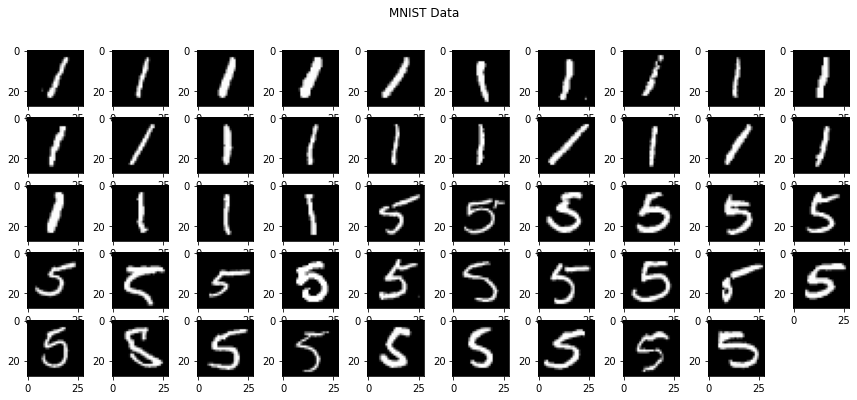

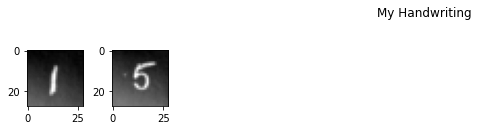

In [17]:
#Dataset Display
plt.figure(figsize = (15, 6))
j = 10
i = 5
for c in range(1, 50):
  plt.subplot(i, j, c)
  plt.imshow(X[c].reshape(28, 28), cmap = 'gray')
  plt.suptitle('MNIST Data')

plt.figure(figsize = (15, 6))
plt.subplot(i, j, 1)
plt.imshow(img1_resized.reshape(28, 28), cmap = 'gray')
plt.subplot(i, j, 2)
plt.imshow(img5_resized.reshape(28, 28), cmap = 'gray')
plt.suptitle('My Handwriting')

plt.show()